In [247]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_standard = pd.read_csv('2016_standard.csv')
df_ppr = pd.read_csv('2016_ppr.csv')

In [4]:
df_standard.head()

,Rank,Name,Team,ByeWeek,Age,Position,PositionRank,Week1ADP,Week2ADP,Week3ADP,HighestADP,LowestADP,AverageDraftPosition
0,1,Antonio Brown,PIT,8,34.0,WR,WR1,NaN,NaN,NaN,NaN,NaN,1.3
1,2,Todd Gurley II,LAR,8,28.0,RB,RB1,NaN,NaN,NaN,NaN,NaN,2.4
2,3,Julio Jones,ATL,11,34.0,WR,WR2,133.5,133.5,133.5,133.5,133.5,3.3
3,4,Odell Beckham Jr.,NYG,8,30.0,WR,WR3,NaN,NaN,NaN,NaN,NaN,4.0
4,5,David Johnson,ARI,9,31.0,RB,RB2,NaN,NaN,NaN,NaN,NaN,5.4


In [5]:
df_ppr.head()

,Rank,Name,Team,ByeWeek,Age,Position,PositionRank,Week1ADP,Week2ADP,Week3ADP,HighestADP,LowestADP,AverageDraftPositionPPR
0,1,Antonio Brown,PIT,8,34.0,WR,WR1,NaN,NaN,NaN,NaN,NaN,1.2
1,2,Julio Jones,ATL,11,34.0,WR,WR2,121.0,121.0,121.0,121.0,121.0,2.8
2,3,Odell Beckham Jr.,NYG,8,30.0,WR,WR3,NaN,NaN,NaN,NaN,NaN,3.4
3,3,David Johnson,ARI,9,31.0,RB,RB1,NaN,NaN,NaN,NaN,NaN,3.4
4,5,Todd Gurley II,LAR,8,28.0,RB,RB2,NaN,NaN,NaN,NaN,NaN,6.3


In [6]:
df = df_standard[['Name','Team','AverageDraftPosition']].merge(df_ppr[['Name','Team','AverageDraftPositionPPR']]
                                                          ,left_on=['Name','Team'],right_on=['Name','Team'])

In [7]:
df['year'] = 2016

In [8]:
df.head()

,Name,Team,AverageDraftPosition,AverageDraftPositionPPR,year
0,Antonio Brown,PIT,1.3,1.2,2016
1,Todd Gurley II,LAR,2.4,6.3,2016
2,Julio Jones,ATL,3.3,2.8,2016
3,Odell Beckham Jr.,NYG,4.0,3.4,2016
4,David Johnson,ARI,5.4,3.4,2016


In [9]:
standard = ['2016_standard.csv','2017_standard.csv','2018_standard.csv','2019_standard.csv','2020_standard.csv',
           '2021_standard.csv','2022_standard.csv']
ppr = ['2016_ppr.csv','2017_ppr.csv','2018_ppr.csv','2019_ppr.csv','2020_ppr.csv',
           '2021_ppr.csv','2022_ppr.csv']

In [10]:
seasons = range(2016,2023)
a = []
for seas,stand,p in zip(seasons,standard,ppr):
    df0 = pd.read_csv(stand,index_col=0)
    df1 = pd.read_csv(p,index_col=0)
    df = df0[['Name','Team','AverageDraftPosition']].merge(df1[['Name','Team','AverageDraftPositionPPR']]
                                                          ,left_on=['Name','Team'],right_on=['Name','Team'])
    df['year'] = seas
    a.append(df)

# Merge Season Data with ADP

In [11]:
df_adp = pd.read_csv('adp.csv',index_col=0)
df_adp.Name = df_adp.Name.str.replace(' II','').str.replace('GordonI','Gordon').str.strip()
df_adp = df_adp.reset_index(drop=True)

df = pd.read_csv('ffb_df.csv',index_col=0)
df.Player = df.Player.str.replace('*','').str.replace('+','').str.strip()

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_18869/845162919.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Player = df.Player.str.replace('*','').str.replace('+','').str.strip()


In [12]:
seasons = range(2016,2023)
new_list = []
for s in seasons:
    list1 = df_adp[df_adp.year==s][['Name']].sort_values('Name')['Name'].tolist()
    list2 = df[df.year==s][['Player']].sort_values('Player')['Player'].tolist()
    player = pd.DataFrame({'player':(list(set(list1).intersection(list2)))})
    comb1 = player.merge(df[df.year==s],left_on=['player'],right_on=['Player'])
    comb2 = comb1.merge(df_adp[df_adp.year==s],left_on=['player'],right_on=['Name'])
    new_list.append(comb2)

In [13]:
test = pd.concat(new_list)
test = test.reset_index(drop=True)
to_drop = ['Player','2:00 PM','2PP','DKPt','FDPt','OvRank','-9999','Name','Team','year_y']
test = test.drop(to_drop,axis=1).copy()

cols = ['player','rk','team','pos','age','g','gs','cmp','pass_att','pass_yds','pass_tds','int','rush_att','rush_yard',
       'y/a','rush_tds','tgt','rec','rec_yards','y/r','rec_tds','fmb','fl','rush_rec_tds','standard_pts','ppr_pts',
       'vbd','pos_rank','year','avg_draft_pos','avg_draft_pos_ppr']

test.columns = cols

test[['y/a','y/r','fmb','standard_pts','ppr_pts','vbd']] = test[['y/a','y/r','fmb','standard_pts','ppr_pts','vbd']].fillna(0)
test = test.dropna()
test = test.drop_duplicates(['player','year'])
test = test.drop(index=[1973])
test.loc[test[test.avg_draft_pos_ppr>350].index,'avg_draft_pos_ppr'] = 350
test.loc[test[test.avg_draft_pos>350].index,'avg_draft_pos'] = 350
test.to_csv('season.csv')

# Exploration

In [138]:
df = pd.read_csv('season.csv',index_col=0)
df = df.sort_values('year').reset_index(drop=True)

In [142]:
df[(df.year==2016) & (df.pos=='RB')].sort_values('pos_rank')

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
218,David Johnson,1,ARI,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,293.0,1239.0,4.23,16.0,120.0,80.0,879.0,10.99,4.0,5.0,3.0,20,328.0,407.8,191.0,1,2016,5.4,3.4
311,Ezekiel Elliott,2,DAL,RB,21,15,15,0.0,0.0,0.0,0.0,0.0,322.0,1631.0,5.07,15.0,39.0,32.0,363.0,11.34,1.0,5.0,1.0,16,293.0,325.4,156.0,2,2016,6.3,8.3
280,LeSean McCoy,4,BUF,RB,28,15,15,0.0,0.0,0.0,0.0,0.0,234.0,1267.0,5.41,13.0,57.0,50.0,356.0,7.12,1.0,3.0,0.0,14,248.0,298.3,111.0,3,2016,19.7,22.0
155,Le'Veon Bell,5,PIT,RB,24,12,12,0.0,1.0,0.0,0.0,0.0,261.0,1268.0,4.86,7.0,94.0,75.0,616.0,8.21,2.0,4.0,1.0,9,242.0,317.4,105.0,4,2016,10.1,12.3
59,DeMarco Murray,6,TEN,RB,28,16,16,1.0,2.0,10.0,1.0,0.0,293.0,1287.0,4.39,9.0,67.0,53.0,377.0,7.11,3.0,3.0,1.0,12,241.0,293.8,104.0,5,2016,36.5,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Raheem Mostert,511,2TM,RB,24,3,0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1.0,0.6,0.0,154,2016,350.0,350.0
399,Rod Smith,567,DAL,RB,24,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,4.0,4.00,0.0,0.0,0.0,0,0.0,1.4,0.0,158,2016,350.0,350.0
392,Marcus Murphy,556,NOR,RB,25,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,3.0,3.00,0.0,0.0,0.0,0,0.0,1.3,0.0,159,2016,350.0,350.0
343,Khiry Robinson,562,NYJ,RB,27,1,0,0.0,0.0,0.0,0.0,0.0,8.0,22.0,2.75,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,0,0.0,0.2,0.0,160,2016,242.0,255.0


### What percent of top x final ppr points by position each season and for all seasons

In [14]:
df = pd.read_csv('season.csv',index_col=0)

In [18]:
def print_pos(df,pos,year,limit):
    print(df[(df.year==year) & (df.pos==pos)][['player','pos','standard_pts','ppr_pts']].sort_values('ppr_pts',ascending=False).head(limit))
    
def top_players_by_pos(yr,limit):
    print(df[df.year==yr][['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(limit).groupby('pos').count()/limit)
    
def print_top_ppr(season,limit):
    print(df[df.year==season][['player','pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(limit))

In [46]:
def proportion_of_pos(df):

    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]

    qb = []
    wr = []
    rb = []
    te = []
    li = [qb,rb,wr,te]
    pos = ['QB','RB','WR','TE']

    for n in range(3,72,3):
        d = df[['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(n).\
        groupby('pos').count()/n
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    return pd.DataFrame({'n':range(3,72,3),'qb':qb,'rb':rb,'wr':wr,'te':te})

2016


<Figure size 1440x720 with 0 Axes>

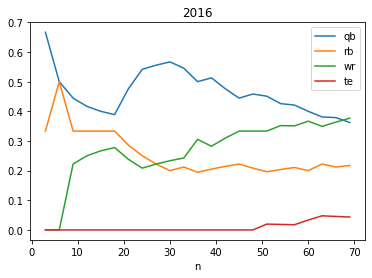

2017


<Figure size 1440x720 with 0 Axes>

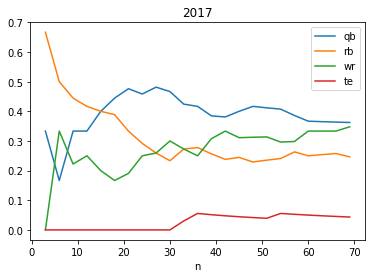

2018


<Figure size 1440x720 with 0 Axes>

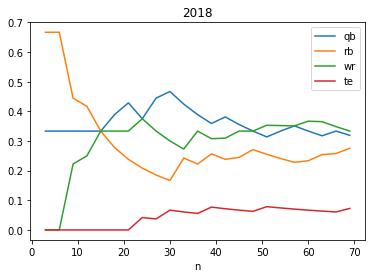

2019


<Figure size 1440x720 with 0 Axes>

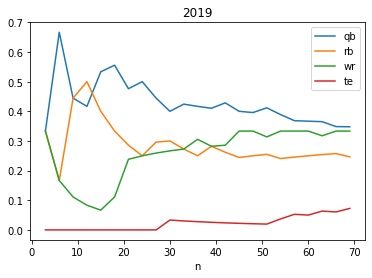

2020


<Figure size 1440x720 with 0 Axes>

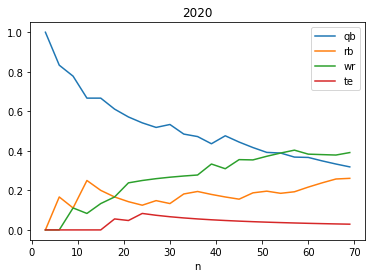

2021


<Figure size 1440x720 with 0 Axes>

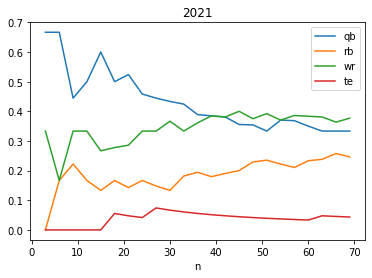

2022


<Figure size 1440x720 with 0 Axes>

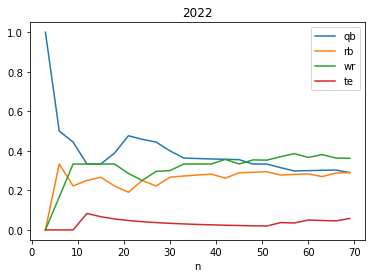

In [48]:
for s in seasons:
    g = proportion_of_pos(df[df.year==s])
    print(s)
    plt.figure(figsize=(20,10))
    g.plot(x='n')
    plt.title(s)
    plt.show()

<Figure size 1440x720 with 0 Axes>

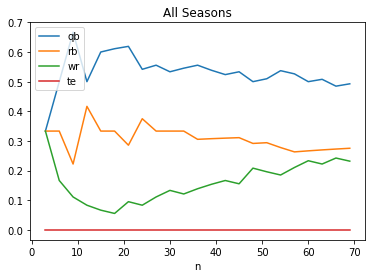

In [49]:
g = proportion_of_pos(df)
plt.figure(figsize=(20,10))
g.plot(x='n')
plt.title('All Seasons')
plt.show()

In [137]:
df[df.year==2016]

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,target
0,Kapri Bibbs,290,DEN,RB,23,12,0,0.0,0.0,0.0,0.0,0.0,29.0,129.0,4.45,0.0,4.0,2.0,75.0,37.50,1.0,0.0,0.0,1,26.0,28.4,0.0,84,2016,350.0,350.0,40.7
1,James White,126,NWE,RB,24,16,4,0.0,0.0,0.0,0.0,0.0,39.0,166.0,4.26,0.0,86.0,60.0,551.0,9.18,5.0,0.0,0.0,5,102.0,161.7,0.0,35,2016,114.3,90.9,134.0
2,Allen Hurns,188,JAX,WR,25,11,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,76.0,35.0,477.0,13.63,3.0,1.0,0.0,3,66.0,100.7,0.0,75,2016,65.8,65.5,99.4
3,Jaelen Strong,368,HOU,WR,22,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.0,14.0,131.0,9.36,0.0,0.0,0.0,0,13.0,27.1,0.0,142,2016,217.0,201.0,12.8
4,Andy Dalton,75,CIN,QB,29,16,16,364.0,563.0,4206.0,18.0,8.0,46.0,184.0,4.00,4.0,0.0,0.0,0.0,0.00,0.0,9.0,3.0,4,261.0,260.6,0.0,12,2016,128.8,132.7,210.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Tyreek Hill,34,KAN,WR,22,16,1,0.0,0.0,0.0,0.0,0.0,24.0,267.0,11.13,3.0,83.0,61.0,593.0,9.72,6.0,4.0,1.0,12,156.0,217.0,30.0,11,2016,350.0,350.0,245.2
470,Jay Ajayi,19,MIA,RB,23,15,12,0.0,0.0,0.0,0.0,0.0,260.0,1272.0,4.89,8.0,35.0,27.0,151.0,5.59,0.0,4.0,1.0,8,188.0,215.3,51.0,11,2016,99.3,111.3,135.1
471,C.J. Uzomah,279,CIN,TE,23,10,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,38.0,25.0,234.0,9.36,1.0,0.0,0.0,1,29.0,54.4,0.0,44,2016,350.0,350.0,25.2
472,John Brown,191,ARI,WR,26,15,6,0.0,0.0,0.0,0.0,0.0,1.0,10.0,10.00,0.0,73.0,39.0,517.0,13.26,2.0,1.0,0.0,2,65.0,103.7,0.0,77,2016,78.3,78.3,69.9


# Add success columns

We need to add a 'success' column. If a player is drafted top 6 by their position, to be a 'success' they need to finish in the top 6. If they're drafted between 6-36 by their position they're final position ranking needs to beat their positional adp to be a success. Anybody who is drafted outside of the top 36 is a success if they finish in the top 36

In [573]:
import pandas as pd
import numpy as np

df = pd.read_csv('season.csv', index_col=0)

seasons = range(2016, 2023)
positions = ['QB', 'RB', 'WR', 'TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year == s) & (df.pos == p)].sort_values('avg_draft_pos_ppr').reset_index(drop=True)
        test['adp_by_pos'] = test.index + 1

        test = test[(test.year == s) & (test.pos == p)].sort_values('ppr_pts', ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index + 1

        add.append(test)

df = pd.concat(add).reset_index(drop=True)

# Use numpy's select method to compute the success column
cond1 = (df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] <= 3) & (df['pos_rank'] <= 3)
cond2 = (df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] <= 3) & (df['pos_rank'] > 3)
cond3 = (df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] > 3) & (df['pos_rank'] <= 12)
cond4 = (df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] > 3) & (df['pos_rank'] > 12)
cond5 = (~df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] <= 6) & (df['pos_rank'] <= 6)
cond6 = (~df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] <= 6) & (df['pos_rank'] > 6)
cond7 = (~df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] > 36) & (df['pos_rank'] < 36)
cond8 = (~df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] > 36) & (df['pos_rank'] >= 36)
cond9 = (~df['pos'].isin(['QB', 'TE'])) & (df['adp_by_pos'] > 6) & (df['adp_by_pos'] <= 36) & (df['pos_rank'] <= df['adp_by_pos'])
df['success'] = np.select([cond1, cond2, cond3, cond4, cond5, cond6, cond7, cond8, cond9], [1, 0, 1, 0, 1, 0, 1, 0, 1], default
                          
# define the bins
bins = [-1, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, np.inf]

# define the labels
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# use pd.cut to assign the round values
df['round'] = pd.cut(df['avg_draft_pos_ppr'], bins=bins, labels=labels)

# convert round column to integer type
df['round'] = df['round'].astype(int)


SyntaxError: invalid syntax (421305235.py, line 35)

In [591]:
df = pd.read_csv('season.csv',index_col=0)

seasons = range(2016,2023)
positions = ['QB','RB','WR','TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year==s)&(df.pos==p)].sort_values('avg_draft_pos_ppr').reset_index(drop=True)
        test['adp_by_pos'] = test.index+1
        
        test = test[(test.year==s)&(test.pos==p)].sort_values('ppr_pts',ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index+1
        
        add.append(test)

df = pd.concat(add).reset_index(drop=True)

# Add 'success' column
for i in range(0,len(df.index)):
    if df.loc[i,'pos'] =='QB' or df.loc[i,'pos'] =='TE':
        
        if df.loc[i, 'adp_by_pos'] <= 3:
            if df.loc[i,'pos_rank'] <= 3:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        else:
            if df.loc[i,'pos_rank']<=12:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

    else:
        if df.loc[i, 'adp_by_pos'] <= 6:
            if df.loc[i,'pos_rank'] <= 6:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        elif df.loc[i, 'adp_by_pos'] > 36:
            if df.loc[i,'pos_rank'] < 36:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        else:
            if df.loc[i,'pos_rank'] <= df.loc[i,'adp_by_pos']:
                df.loc[i, 'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        
# Add 'round' columns
for i in range(0,len(df.index)):
    if df.loc[i,'avg_draft_pos_ppr'] <= 12:
        df.loc[i, 'round'] = 1
    elif df.loc[i,'avg_draft_pos_ppr'] <= 24:
        df.loc[i, 'round'] = 2
    elif df.loc[i,'avg_draft_pos_ppr'] <= 36:
        df.loc[i, 'round'] = 3
    elif df.loc[i,'avg_draft_pos_ppr'] <= 48:
        df.loc[i, 'round'] = 4
    elif df.loc[i,'avg_draft_pos_ppr'] <= 60:
        df.loc[i, 'round'] = 5
    elif df.loc[i,'avg_draft_pos_ppr'] <= 72:
        df.loc[i, 'round'] = 6
    elif df.loc[i,'avg_draft_pos_ppr'] <= 84:
        df.loc[i, 'round'] = 7
    elif df.loc[i,'avg_draft_pos_ppr'] <= 96:
        df.loc[i, 'round'] = 8
    elif df.loc[i,'avg_draft_pos_ppr'] <= 108:
        df.loc[i, 'round'] = 9
    elif df.loc[i,'avg_draft_pos_ppr'] <= 120:
        df.loc[i, 'round'] = 10
    elif df.loc[i,'avg_draft_pos_ppr'] <= 132:
        df.loc[i, 'round'] = 11
    elif df.loc[i,'avg_draft_pos_ppr'] <= 144:
        df.loc[i, 'round'] = 12
    elif df.loc[i,'avg_draft_pos_ppr'] <= 156:
        df.loc[i, 'round'] = 13
    elif df.loc[i,'avg_draft_pos_ppr'] <= 168:
        df.loc[i, 'round'] = 14
    else:
        df.loc[i, 'round'] = 15

In [592]:
df.to_csv('season.csv')

In [572]:
df.sample(20)

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,adp_by_pos,success,round
3487,Darren Waller,202,LVR,TE,30,9,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,43.0,28.0,388.0,13.86,3.0,0.0,0.0,3,57.0,84.8,0.0,30,2022,47.9,50.2,5,0.0,5.0
598,Chris Ivory,181,JAX,RB,29,14,3,0.0,0.0,0.0,0.0,0.0,112.0,382.0,3.41,1.0,28.0,21.0,175.0,8.33,1.0,2.0,2.0,2,64.0,84.7,0.0,57,2017,253.0,291.0,82,0.0,15.0
921,Greg Olsen,304,CAR,TE,32,7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,38.0,17.0,191.0,11.24,1.0,0.0,0.0,1,25.0,42.1,0.0,45,2017,50.4,51.5,3,0.0,5.0
3386,Sterling Shepard,336,NYG,WR,29,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.0,13.0,154.0,11.85,1.0,0.0,0.0,1,21.0,34.4,0.0,118,2022,186.0,172.0,67,0.0,15.0
2979,Kyle Rudolph,298,NYG,TE,32,16,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,39.0,26.0,257.0,9.88,1.0,0.0,0.0,1,34.0,59.7,0.0,41,2021,350.0,350.0,52,0.0,15.0
3176,Rex Burkhead,259,HOU,RB,32,16,0,0.0,1.0,0.0,0.0,0.0,26.0,80.0,3.08,0.0,51.0,37.0,204.0,5.51,1.0,0.0,0.0,2,40.0,77.4,0.0,54,2022,192.0,193.0,55,0.0,15.0
224,Golden Tate,66,DET,WR,28,16,16,0.0,0.0,0.0,0.0,0.0,10.0,4.0,0.40,0.0,135.0,91.0,1077.0,11.84,4.0,2.0,1.0,4,132.0,223.1,6.0,17,2016,60.0,43.6,24,1.0,4.0
1075,Jalen Richard,139,OAK,RB,25,16,1,0.0,0.0,0.0,0.0,0.0,55.0,259.0,4.71,1.0,81.0,68.0,607.0,8.93,0.0,3.0,2.0,1,89.0,156.6,0.0,29,2018,232.0,224.0,72,1.0,15.0
1007,Nick Mullens,102,SFO,QB,23,8,8,176.0,274.0,2277.0,13.0,10.0,18.0,-16.0,-0.89,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.0,0,123.0,123.5,0.0,32,2018,350.0,350.0,41,0.0,15.0
2822,Tre'Quan Smith,213,NOR,WR,25,11,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,50.0,32.0,377.0,11.78,3.0,1.0,0.0,3,56.0,87.7,0.0,73,2021,173.0,164.0,60,0.0,14.0


### Successful percentage by round

In [41]:
rounds = range(1,16)
seasons = range(2010,2023)
pos = ['QB','RB','WR','TE']
qb = []
rb = []
wr = []
te = []
ro = []
pos_name = [qb,rb,wr,te]

for s in seasons:
    df1 = df[df.year==s]
    for r in rounds:
        ro.append(r)
        for p,n in zip(pos,pos_name):
            if df1[(df1['round']==r) & (df1.pos==p)].success.count() == 0:
                n.append(0)
                
            else:
                n.append(df1[(df1['round']==r) & (df1.pos==p)].success.sum()/df1[(df1['round']==r) & (df1.pos==p)].success.count())
               

year = []
for s in seasons:
    for r in rounds:
        year.append(s)
        
df_success = pd.DataFrame({'season':year,'qb':qb,'rb':rb,'wr':wr,'te':te,'rounds':ro})

In [54]:
df[(df.pos=='QB')&(df['round']==1)]

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,...,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
1,17,Aaron Rodgers,GNB,QB,27,15,15,312.0,475.0,3922.0,...,1.0,4,304.5,75.0,2,2010,7.0,1,1.0,1.0
533,67,Michael Vick,PHI,QB,31,13,13,253.0,423.0,3303.0,...,4.0,1,233.0,10.0,11,2011,8.0,1,0.0,1.0
1053,10,Drew Brees,NOR,QB,33,16,16,422.0,670.0,5177.0,...,1.0,1,345.6,95.0,1,2012,11.0,3,1.0,1.0
1054,11,Aaron Rodgers,GNB,QB,29,16,16,371.0,552.0,4295.0,...,4.0,2,344.6,93.0,2,2012,3.0,1,1.0,1.0
1055,12,Tom Brady,NWE,QB,35,16,16,401.0,637.0,4827.0,...,0.0,4,340.3,90.0,3,2012,6.0,2,1.0,1.0
2116,32,Peyton Manning,DEN,QB,38,16,16,395.0,597.0,4727.0,...,2.0,0,312.7,47.0,4,2014,11.0,1,0.0,1.0


In [64]:
import numpy as np

In [69]:
df.head(1)

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,...,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
0,12,Michael Vick,PHI,QB,30,12,12,233.0,372.0,3018.0,...,3.0,9,310.3,81.0,1,2010,350.0,54,1.0,15.0


In [76]:
1 - non_inj.groupby(['pos','round'])[['success']].count()/df.groupby(['pos','round'])[['success']].count()

success
pos round          
QB  1.0    0.000000
    2.0    0.076923
    3.0    0.153846
    4.0    0.142857
    5.0    0.166667
    6.0    0.064516
    7.0    0.173913
    8.0    0.045455
    9.0    0.227273
    10.0   0.095238
    11.0   0.250000
    12.0   0.350000
    13.0   0.380952
    14.0   0.250000
    15.0   0.800562
RB  1.0    0.231579
    2.0    0.164179
    3.0    0.241935
    4.0    0.245283
    5.0    0.333333
    6.0    0.309524
    7.0    0.230769
    8.0    0.183673
    9.0    0.181818
    10.0   0.303030
    11.0   0.236842
    12.0   0.406250
    13.0   0.444444
    14.0   0.297297
    15.0   0.453645
TE  1.0    0.000000
    2.0    0.333333
    3.0    0.333333
    4.0    0.214286
    5.0    0.380952
    6.0    0.222222
    7.0    0.291667
    8.0    0.176471
    9.0    0.125000
    10.0   0.307692
    11.0   0.166667
    12.0   0.083333
    13.0   0.208333
    14.0   0.148148
    15.0   0.299831
WR  1.0    0.119048
    2.0    0.119403
    3.0    0.138462
    4.0    0.109589
    5.0    0.152542
    6.0    0.228070
    7.0    0.297872
    8.0    0.207547
    9.0    0.125000
    10.0   0.160000
    11.0   0.227273
    12.0   0.326923
    13.0   0.310345
    14.0   0.297297
    15.0   0.430954

In [73]:
df.groupby(['pos','round'])[['success']].count()

success
pos round         
QB  1.0          6
    2.0         13
    3.0         13
    4.0         14
    5.0         18
    6.0         31
    7.0         23
    8.0         22
    9.0         22
    10.0        21
    11.0        24
    12.0        20
    13.0        21
    14.0        12
    15.0       712
RB  1.0         95
    2.0         67
    3.0         62
    4.0         53
    5.0         51
    6.0         42
    7.0         52
    8.0         49
    9.0         44
    10.0        33
    11.0        38
    12.0        32
    13.0        27
    14.0        37
    15.0      1413
TE  1.0          3
    2.0          9
    3.0         12
    4.0         14
    5.0         21
    6.0         18
    7.0         24
    8.0         17
    9.0         16
    10.0        13
    11.0        12
    12.0        12
    13.0        24
    14.0        27
    15.0      1184
WR  1.0         42
    2.0         67
    3.0         65
    4.0         73
    5.0         59
    6.0         57
    7.0         47
    8.0         53
    9.0         48
    10.0        50
    11.0        44
    12.0        52
    13.0        29
    14.0        37
    15.0      1919

In [71]:
non_inj.groupby(['pos','round'])[['success','pos_rank']].agg(['mean','count'])

success          pos_rank      
               mean count        mean count
pos round                                  
QB  1.0    0.666667     6    3.833333     6
    2.0    0.333333    12    4.833333    12
    3.0    0.727273    11    5.727273    11
    4.0    0.583333    12    7.250000    12
    5.0    0.466667    15    8.466667    15
    6.0    0.689655    29    9.448276    29
    7.0    0.315789    19   14.473684    19
    8.0    0.666667    21   11.333333    21
    9.0    0.647059    17   10.588235    17
    10.0   0.736842    19   10.736842    19
    11.0   0.388889    18   14.388889    18
    12.0   0.307692    13   15.769231    13
    13.0   0.461538    13   13.307692    13
    14.0   0.111111     9   21.222222     9
    15.0   0.176056   142   22.260563   142
RB  1.0    0.452055    73    9.876712    73
    2.0    0.571429    56   12.107143    56
    3.0    0.340426    47   21.085106    47
    4.0    0.450000    40   23.150000    40
    5.0    0.382353    34   31.911765    34
    6.0    0.586207    29   24.241379    29
    7.0    0.525000    40   35.800000    40
    8.0    0.500000    40   38.800000    40
    9.0    0.611111    36   34.277778    36
    10.0   0.521739    23   41.608696    23
    11.0   0.310345    29   43.586207    29
    12.0   0.263158    19   48.578947    19
    13.0   0.400000    15   45.666667    15
    14.0   0.307692    26   49.500000    26
    15.0   0.107513   772   85.363990   772
TE  1.0    1.000000     3    1.666667     3
    2.0    0.833333     6    2.833333     6
    3.0    0.375000     8    4.375000     8
    4.0    0.454545    11    4.909091    11
    5.0    0.769231    13    8.384615    13
    6.0    0.857143    14    8.642857    14
    7.0    0.588235    17   12.764706    17
    8.0    0.714286    14   10.785714    14
    9.0    0.571429    14   14.642857    14
    10.0   0.666667     9    9.000000     9
    11.0   0.600000    10   13.400000    10
    12.0   0.272727    11   18.636364    11
    13.0   0.421053    19   21.368421    19
    14.0   0.434783    23   16.695652    23
    15.0   0.050663   829   53.492159   829
WR  1.0    0.621622    37   10.297297    37
    2.0    0.423729    59   14.101695    59
    3.0    0.375000    56   19.607143    56
    4.0    0.415385    65   25.169231    65
    5.0    0.500000    50   27.200000    50
    6.0    0.568182    44   30.113636    44
    7.0    0.454545    33   36.303030    33
    8.0    0.380952    42   43.904762    42
    9.0    0.476190    42   43.000000    42
    10.0   0.261905    42   58.095238    42
    11.0   0.441176    34   48.764706    34
    12.0   0.257143    35   48.485714    35
    13.0   0.200000    20   57.500000    20
    14.0   0.269231    26   58.153846    26
    15.0   0.092491  1092  100.705128  1092

In [542]:
df[(df.pos=='QB')&(df['round']==2)]

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,adp_by_pos,success,round
501,Aaron Rodgers,96,GNB,QB,34,7,7,154.0,238.0,1675.0,16.0,6.0,24.0,126.0,5.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,130.0,129.6,0.0,28,2017,19.8,23.4,1,0.0,2.0
1505,Patrick Mahomes,48,KAN,QB,24,14,14,319.0,484.0,4031.0,26.0,5.0,43.0,218.0,5.07,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2,287.0,287.0,23.0,7,2019,16.4,19.3,1,0.0,2.0
2004,Patrick Mahomes,10,KAN,QB,25,15,15,390.0,588.0,4740.0,38.0,6.0,62.0,308.0,4.97,2.0,2.0,0.0,0.0,0.0,0.0,5.0,2.0,2,374.0,374.4,92.0,4,2020,10.3,18.7,1,0.0,2.0
2009,Lamar Jackson,30,BAL,QB,23,15,15,242.0,376.0,2757.0,26.0,9.0,159.0,1005.0,6.32,7.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,7,333.0,332.8,50.0,9,2020,18.1,22.7,2,0.0,2.0
2528,Patrick Mahomes,13,KAN,QB,26,17,17,436.0,658.0,4839.0,37.0,13.0,66.0,381.0,5.77,2.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,2,362.0,361.7,88.0,4,2021,14.7,19.8,1,0.0,2.0
3046,Josh Allen,7,BUF,QB,26,16,16,359.0,567.0,4283.0,35.0,14.0,124.0,762.0,6.15,7.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,7,396.0,395.5,117.0,2,2022,17.0,19.1,1,1.0,2.0


In [43]:
gr = df_success.groupby('rounds').mean()[['qb','rb','wr','te']]

<Figure size 1296x648 with 0 Axes>

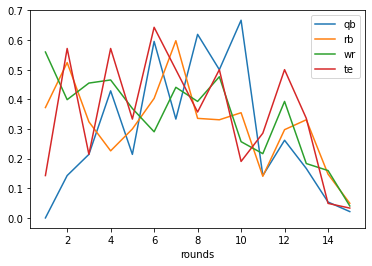

In [544]:
plt.figure(figsize=(18,9))
gr.plot()
plt.show()

<AxesSubplot:xlabel='pos_rank'>

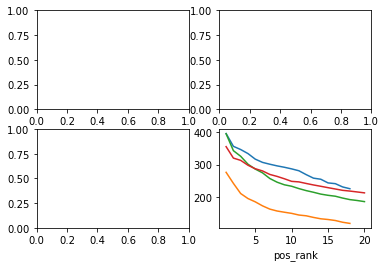

In [545]:
plt.subplots(2,2)
df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()
df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()
df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

<AxesSubplot:xlabel='pos_rank'>

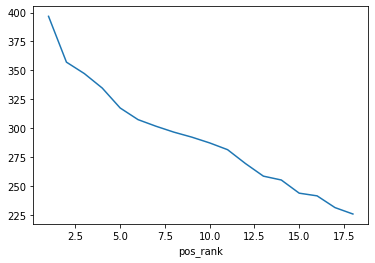

In [546]:
df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()

<AxesSubplot:xlabel='pos_rank'>

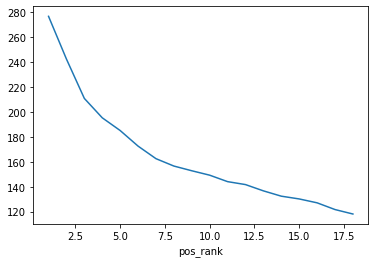

In [547]:
df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()

<AxesSubplot:xlabel='pos_rank'>

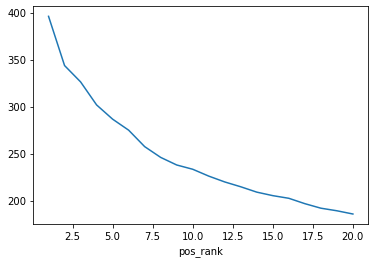

In [548]:
df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

<AxesSubplot:xlabel='pos_rank'>

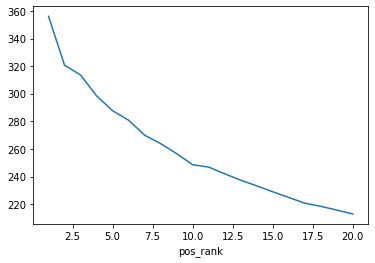

In [549]:
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

In [26]:
df = pd.read_csv('season1.csv',index_col=0)

In [40]:
df[df.year==2014][['player','year','pos','pos_rank','adp','round','ppr_pts','rk']].sort_values(by='adp').head(40)

,player,year,pos,pos_rank,adp,round,ppr_pts,rk
2199,LeSean McCoy,2014,RB,12,1.0,1.0,199.4,30
2194,Jamaal Charles,2014,RB,7,2.0,1.0,250.4,12
2364,Calvin Johnson,2014,WR,16,3.0,1.0,226.7,41
2190,Matt Forte,2014,RB,3,4.0,1.0,346.6,5
2318,Adrian Peterson,2014,RB,131,5.0,1.0,11.3,404
2193,Eddie Lacy,2014,RB,6,6.0,1.0,272.6,7
2350,Demaryius Thomas,2014,WR,2,7.0,1.0,340.9,9
2538,Jimmy Graham,2014,TE,2,8.0,1.0,229.9,29
2352,Dez Bryant,2014,WR,4,9.0,1.0,316.0,10
2281,Montee Ball,2014,RB,94,10.0,1.0,36.4,289


In [22]:
df[(df.pos_rank<4)&(df.pos=='QB')][['player','year','pos','pos_rank','round','ppr_pts']]

,player,year,pos,pos_rank,round,ppr_pts
0,Michael Vick,2010,QB,1,15.0,310.3
1,Aaron Rodgers,2010,QB,2,1.0,304.5
2,Tom Brady,2010,QB,3,3.0,299.0
523,Aaron Rodgers,2011,QB,1,2.0,397.4
524,Drew Brees,2011,QB,2,3.0,393.6
525,Cam Newton,2011,QB,3,14.0,370.3
1053,Drew Brees,2012,QB,1,1.0,345.6
1054,Aaron Rodgers,2012,QB,2,1.0,344.6
1055,Tom Brady,2012,QB,3,1.0,340.3
1586,Peyton Manning,2013,QB,1,4.0,410.0


In [20]:
df[(df.pos_rank<4)&(df.pos=='QB')].groupby(['pos_rank','round'])[['player']].count()

player
pos_rank round        
1        1.0         1
         2.0         2
         3.0         1
         4.0         2
         5.0         1
         6.0         1
         9.0         2
         11.0        2
         15.0        1
2        1.0         2
         2.0         1
         3.0         2
         5.0         1
         6.0         2
         8.0         2
         10.0        1
         12.0        1
         13.0        1
3        1.0         1
         3.0         2
         4.0         1
         5.0         1
         6.0         3
         7.0         1
         8.0         1
         9.0         1
         10.0        1
         14.0        1

In [609]:
notinj[(notinj.pos=='RB') & (notinj.adp_by_pos<18)].groupby('adp_by_pos')[['ppr_pts','pos_rank','round','success']].mean()

,ppr_pts,pos_rank,round,success
adp_by_pos,,,,
1,341.333333,4.666667,1.000000,0.666667
2,266.266667,8.833333,1.000000,0.333333
3,326.133333,4.333333,1.000000,0.666667
4,284.271429,7.571429,1.000000,0.571429
5,270.440000,12.000000,1.000000,0.400000
6,261.425000,9.750000,1.000000,0.500000
7,239.300000,13.500000,1.333333,0.333333
8,217.000000,12.800000,1.200000,0.400000
9,277.950000,8.166667,1.833333,0.666667


In [610]:
df[(df.pos=='RB') & (df.adp_by_pos<18)].groupby('adp_by_pos')[['ppr_pts','pos_rank','round','success']].mean()

,ppr_pts,pos_rank,round,success
adp_by_pos,,,,
1,200.185714,34.714286,1.000000,0.285714
2,230.428571,23.428571,1.000000,0.285714
3,308.571429,5.428571,1.000000,0.571429
4,284.271429,7.571429,1.000000,0.571429
5,222.071429,28.000000,1.000000,0.285714
6,232.714286,16.571429,1.142857,0.428571
7,244.471429,12.714286,1.285714,0.285714
8,189.800000,25.857143,1.285714,0.285714
9,261.857143,10.571429,1.714286,0.571429


In [604]:
df[df.g/16<.50].shape

(805, 34)

In [607]:
notinj = df[df.g>12]

In [595]:
df.shape

(3566, 34)

In [597]:
df.sample(30)

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,adp_by_pos,success,round
1236,John Brown,118,BAL,WR,28,16,15,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.33,0.0,97.0,42.0,715.0,17.02,5.0,0.0,0.0,5,102.0,143.9,0.0,43,2018,127.1,122.7,46,0.0,11.0
289,Dorial Green-Beckham,220,PHI,WR,23,15,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,74.0,36.0,392.0,10.89,2.0,0.0,0.0,2,51.0,87.2,0.0,82,2016,187.0,159.3,61,0.0,14.0
2973,Jonnu Smith,271,NWE,TE,26,16,11,0.0,0.0,0.0,0.0,0.0,9.0,40.0,4.44,0.0,45.0,28.0,294.0,10.50,1.0,1.0,0.0,1,39.0,67.4,0.0,35,2021,133.4,118.4,13,0.0,10.0
2906,Mike Thomas,471,CIN,WR,27,12,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,11.0,5.0,52.0,10.40,0.0,0.0,0.0,0,5.0,10.2,0.0,157,2021,342.0,350.0,170,0.0,15.0
150,Kerwynn Williams,285,ARI,RB,25,10,0,0.0,0.0,0.0,0.0,0.0,18.0,157.0,8.72,2.0,2.0,1.0,6.0,6.00,0.0,0.0,0.0,2,28.0,29.3,0.0,85,2016,350.0,350.0,130,0.0,15.0
119,Rex Burkhead,203,CIN,RB,26,16,1,0.0,0.0,0.0,0.0,0.0,74.0,344.0,4.65,2.0,20.0,17.0,145.0,8.53,0.0,1.0,1.0,2,59.0,75.9,0.0,54,2016,350.0,350.0,126,0.0,15.0
3344,Rondale Moore,234,ARI,WR,22,8,8,0.0,0.0,0.0,0.0,0.0,6.0,-5.0,-0.83,0.0,56.0,41.0,414.0,10.10,1.0,0.0,0.0,1,47.0,87.9,0.0,76,2022,163.8,144.8,53,0.0,13.0
3308,Marquise Brown,136,ARI,WR,25,12,10,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,0.0,107.0,67.0,709.0,10.58,3.0,1.0,0.0,3,89.0,156.0,0.0,40,2022,67.3,68.0,25,0.0,6.0
3062,Kyler Murray,85,ARI,QB,25,11,11,259.0,390.0,2368.0,14.0,7.0,67.0,418.0,6.24,3.0,0.0,0.0,0.0,0.00,0.0,8.0,2.0,3,201.0,200.5,0.0,18,2022,64.3,62.1,7,0.0,6.0
3181,Matt Breida,258,NYG,RB,27,17,1,0.0,0.0,0.0,0.0,0.0,54.0,220.0,4.07,1.0,25.0,20.0,118.0,5.90,0.0,0.0,0.0,1,40.0,59.8,0.0,59,2022,223.0,234.0,68,0.0,15.0


In [381]:
df_success.head()

,season,qb,rb,wr,te,rounds
0,2016,0.0,0.400000,0.500000,0.0,1
1,2016,0.0,0.600000,0.375000,0.0,2
2,2016,0.0,0.666667,0.666667,0.0,3
3,2016,1.0,0.200000,0.200000,0.0,4
4,2016,0.5,0.250000,0.333333,1.0,5


# Start Modeling

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [382]:
def plot_residuals(y,yhat):
    '''
    y is the variable you're using to make your prediction
    yhat is the residual from your predictions
    '''
    import matplotlib.pyplot as plt
    res = yhat-y
    plt.scatter(y,res)
    plt.show()  
    

In [508]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

r = Ridge(alpha=1)

rf = RandomForestClassifier(max_depth=3, max_samples = .4, n_estimators = 100)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(r, 
                                n_features_to_select=10, 
                                direction="forward",
                                cv=split,
                                n_jobs=1
                               )

def backtest(data, model, predictors, target, start=2, step=1):
    all_predictions = []
    
    seasons = sorted(data["year"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["year"] < season]
        test = data[data["year"] == season]
        
        model.fit(train[predictors], train[target])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test[target], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [524]:
df = pd.read_csv('season.csv',index_col=0)
df = df.sort_values('year').reset_index(drop=True)

def add_target(group):
    group["target"] = group["ppr_pts"].shift(-1)
    return group

df = df.groupby('player').apply(add_target)



In [525]:
df1 = df[~(df.target.isna())&(df.year!=2022)]
df2 = df[df.year==2022]
df3 = pd.concat([df1,df2])

test = df3[df3.year==2022]
df3 = df3[df3.year<2022]

In [526]:
df = df3.select_dtypes(['int','float']).drop(['rk','standard_pts',
                                                     'ppr_pts','avg_draft_pos'],axis=1)

selected_columns = df.columns[df.columns!='target']



In [527]:
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])




In [528]:
sfs.fit(df[selected_columns], df['target'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=10,
                          n_jobs=1)

In [531]:
predictors = list(selected_columns[sfs.get_support()])
predictions = backtest(df, r, predictors, 'target')

In [569]:
predictors

['age',
 'g',
 'pass_tds',
 'rush_yard',
 'y/a',
 'rec_yards',
 'y/r',
 'fl',
 'rush_rec_tds',
 'avg_draft_pos_ppr']

In [537]:
mean_squared_error(predictions["actual"], predictions["prediction"])**.5

62.04799336739081

In [538]:
sfs.predict(test[selected_columns])

AttributeError: 'SequentialFeatureSelector' object has no attribute 'predict'